In [5]:
"""
Minimal example: optimize 3D V(x) with tensor train.
See next cell for balanced tree and how to provide starting points.
"""
import qutree
import importlib
import qutree.optimization

importlib.reload(qutree)
importlib.reload(qutree.optimization)

from qutree import Grid, Objective
from qutree.optimization import TensorRankOptimization, random_grid_points
from qutree.benchmark_functions import *
import numpy as np

N, r, f, nsweep = 11, 4, 3, 3

primitive_grid = [Grid(np.linspace(0., 1., N, endpoint=True), [k]) for k in range(f)]

obj = Objective(double_minimum_exp, lambda x: -np.exp(-x))

model = TensorRankOptimization(primitive_grid, r)

grid = random_grid_points(primitive_grid, r)
grid = model.optimize(grid, obj, nsweep)

vs = np.array([v for v in obj.cache.values()])
f_min = np.min(obj.logger.df['f'].array)

print(obj)
display(obj.logger.df)
print('minimal: ', f_min)

Optimal value:
x1       0.100000
x2       0.100000
x3       0.100000
f       -0.000514
epoch    0.000000
Name: 94, dtype: float64

Number of objective function calls: 182
Number of cached function accesses: 214
Total number calls: 396


,x1,x2,x3,f,epoch
0,0.0,0.4,1.0,0.922784,0
1,0.1,0.4,1.0,0.907398,0
2,0.2,0.4,1.0,0.886133,0
3,0.3,0.4,1.0,0.856075,0
4,0.4,0.4,1.0,0.816458,0
...,...,...,...,...,...
177,0.1,0.6,0.2,0.532251,1
178,0.1,0.7,0.2,0.659586,1
179,0.1,0.8,0.2,0.765458,1
180,0.1,0.9,0.2,0.846871,1


minimal:  -0.0005140738882844454


In [6]:
# represent via TRC
# A via 3 options: a.) full matrix, b.) elements only where groups match, c.) diagonal


Optimal value:
x1       0.200
x2       0.100
x3       0.100
f        0.121
sweep    0.000
node     0.000
Name: 204, dtype: float64

Number of objective function calls: 399
Number of cached function accesses: 481
Total number calls: 880


,x1,x2,x3,f,sweep,node
0,0.0,1.0,0.0,1.023,0,2
1,0.1,1.0,0.0,1.012,0,2
2,0.2,1.0,0.0,1.023,0,2
3,0.3,1.0,0.0,1.026,0,2
4,0.4,1.0,0.0,0.941,0,2
...,...,...,...,...,...,...
394,0.4,0.3,0.3,0.297,1,0
395,0.4,0.3,0.5,0.429,1,0
396,0.4,0.3,0.7,0.479,1,0
397,0.4,0.3,0.8,0.482,1,0


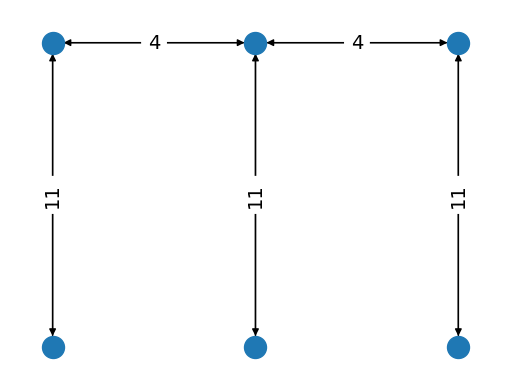

In [7]:
"""
Minimal example: optimize 3D V(x) with tensor train.
See next cell for balanced tree and how to provide starting points.
"""
from qutree import *


obj = Objective(double_minimum_nd, lambda x: -np.exp(-0.01*x))
# obj = Objective(double_minimum_exp, lambda x: -np.exp(-0.01*x))
N, r, f, nsweeps, seed = 11, 4, 3, 2, np.random.randint(100000)

# --- Pick a network structure: ---
G = tensor_train_graph(f, r, N)
fig = plot_tt_diagram(G)

# boundaries of primitive grid
primitive_grid = [np.linspace(0., 1., num = N)] * f

G_opt = ttnopt(G, obj, nsweeps, primitive_grid)

# Display output (can vary with random parameters)
print(obj)
display(obj.logger.df)

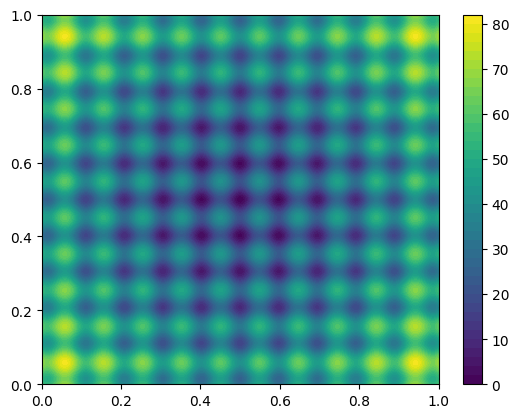

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from qutree.benchmark_functions import *

x = np.linspace(-0, 1, 400)
y = np.linspace(-0, 1, 400)
X, Y = np.meshgrid(x, y)
f = rastigrin

Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f(np.array([X[i, j], Y[i, j]]))

plt.figure()
plt.contourf(X, Y, Z, levels=50)
plt.colorbar()
plt.show()